**To Explore Supervised Machine Learning**

The task given to us is to find - What will be predicted score if a student study for 9.25 hrs in a day?

Steps:
---


*   Import all the required libraries
*   Collection of data

*   Visualization of data
*   Segregation of the data for training and testing

*   Training the data using Logistic Regression Algorithm
*   Testing the data and finding its accuracy

*   Predict the Result














**Import all the required libraries**

In [211]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Collection of data**

In [212]:
# Reading the CSV file
data = pd.read_csv('http://bit.ly/w-data')

In [215]:
# Print data
data

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30
5,1.50,20
6,9.20,88
7,5.50,60
8,8.30,81
9,2.70,25


In [160]:
# Describing the data
data.describe()

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


**Visualization of data**

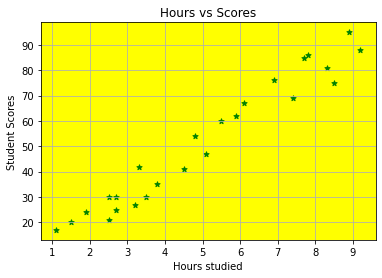

In [162]:
# Plotting the graph
# x-axis values 
x = data['Hours']
# y-axis values 
y = data['Scores']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "Data points", color= "green", marker= "*", s=30) 

# x-axis label 
plt.xlabel('Hours studied') 
# frequency label 
plt.ylabel('Student Scores') 
# plot title 
plt.title('Hours vs Scores') 
# showing grid
plt.grid()
plt.rcParams['axes.facecolor'] = '#FFFF00'
# function to show the plot 
plt.show() 



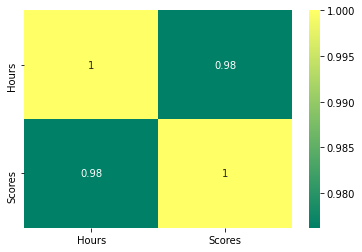

From the graph, we can refer that there is 98% corelation between Hours and Scores


In [163]:
#To find the corelation between the number of hours studied and scores obtained
relation = data.corr()
sns.heatmap(relation, annot=True, cmap='summer') 
plt.show()
print('From the graph, we can refer that there is 98% corelation between Hours and Scores')

**Segregation of the data for training and testing**

In [164]:
# Classification of data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [165]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Training the data using Logistic Regression Algorithm**

In [166]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

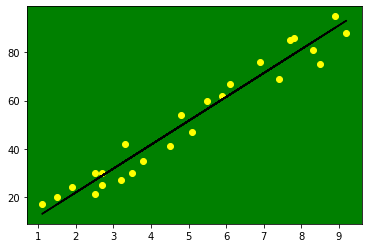

(array([9.91065648]), 2.018160041434662)

In [196]:
# Plotting the Linear regression line
line = model.coef_ * x + model.intercept_

# Plotting for the test data
plt.rcParams['axes.facecolor'] = 'green'
plt.scatter(x, y,color ='#FFFF00')
plt.plot(x, line, color='black')
plt.show()
model.coef_,model.intercept_

**Testing the data and finding its accuracy**

In [168]:
# Predicting the Result
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [169]:
# Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


<BarContainer object of 5 artists>

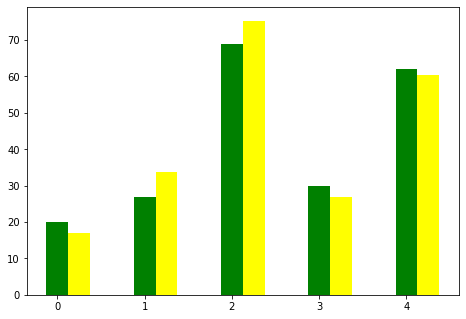

In [170]:
# Comparing Actual vs Predicted score through bar plot
l = []
for i in y_test:
  l.append(i)
for i in y_pred:
  l.append(i)
l = np.array(l)
l = l.reshape(2,5)
data = l
X = np.arange(5)
fig = plt.figure()
plt.rcParams['axes.facecolor'] = 'white'
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'green', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'yellow', width = 0.25)

In [171]:
#Accuracy of training and testing data
print(f'The train score:  {model.score(X_train,y_train)}')
print(f'The test score:   {model.score(X_test,y_test)}')

The train score:  0.9515510725211553
The test score:   0.9454906892105354


In [218]:
# Calculating the mean absolute error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mean squared error: ', mean_squared_error(y_test,y_pred))
print('mean absolute error: ', mean_absolute_error(y_test,y_pred))


mean squared error:  21.598769307217456
mean absolute error:  4.183859899002982


**Predict the Result**

In [172]:
# Predicting the result for the input of 9.25 Hours 
hours = [[9.25]]
pred1 = model.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred1))

Number of Hours = [[9.25]]
Predicted Score = [93.69173249]


**Optional**

To predict the best algorithm with the best accuracy we installed lazypredict, XGBoost and lightgbm

In [175]:
# Installation lazypredict and XGBoost
!pip install lazypredict
!pip install xgboost

In [176]:
import xgboost as xgb
from lazypredict.Supervised import LazyRegressor

In [177]:
# Installation of lightgbm
!pip install lightgbm

In [178]:
# Fitting the data into the model
clf = LazyRegressor(ignore_warnings=True)
model1, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 39/39 [00:00<00:00, 47.13it/s]

[12:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [179]:
# Predicting the best algorithm with least RMSE
model1

,R-Squared,RMSE,Time Taken
Model,,,
Ridge,0.95,4.39,0.01
Lasso,0.95,4.41,0.01
ElasticNetCV,0.95,4.48,0.05
LassoCV,0.95,4.51,0.06
SGDRegressor,0.95,4.59,0.01
RidgeCV,0.95,4.61,0.01
BayesianRidge,0.95,4.63,0.01
LinearRegression,0.95,4.65,0.01
LarsCV,0.95,4.65,0.01


Lasso algorithm has the least RMSE

In [182]:
# Implementing Lasso algorithm
from sklearn.linear_model import Lasso
model2 = Lasso()
model2.fit(X_train, y_train)
print('Train accuracy')
print(model2.score(X_train, y_train))
print('\nTest accuracy')
print(model2.score(X_test, y_test))

Train accuracy
0.951297282107653

Test accuracy
0.9482597940686198


In [181]:
# Predicting the Result
pred2 = model2.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred2))

Number of Hours = [[9.25]]
Predicted Score = [93.04269714]


**Conclusion**

In [208]:
print('Linear Regression')
print('Test accuracy: ',model.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',pred1,'\n')
print('*'*50,'\n')
print('Lasso')
print('Test accuracy: ',model2.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',pred2)

Linear Regression
Test accuracy:  0.9454906892105354
Predicted score for 9.25 hours:  [93.69173249] 

************************************************** 

Lasso
Test accuracy:  0.9482597940686198
Predicted score for 9.25 hours:  [93.04269714]
